In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
pd.options.display.max_columns = 25

<img src="img/alura-vox.png" style="height:260px">

# Tarefas
- Analisar a variável target `churn`
- Visualizar a distribuição da variável target `churn`
- Criar visualizações da variável target `churn`
- Analisar a correlação das variáveis da base de dados
- Testar diferentes tipos de gráficos 

# Importando base de dados
Dados que já foram tratados durante a semana 1

In [3]:
dados = pd.read_json('dados_churn_clean.json')
dados.head()

,cliente_id,churn,genero,idoso,casado,dependentes,duracao_contrato,assinatura_telefone,linhas_extras,assinatura_internet,protecao_online,backup_nuvem,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,contrato,cobranca_digital,metodo_pagamento,custo_diario,custo_mensal,custo_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,dsl,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,2.19,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,dsl,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,fibra,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,fibra,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,fibra,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque,2.80,83.9,267.40


# Estatística Descritiva das Variáveis Numéricas

In [4]:
descricao_numerica = dados.describe().T
descricao_numerica_colunas = {'count': 'Observações', 'mean': 'Média', 'std': 'Desvio Padrão', 'min': 'Valor Mínimo', 'max': 'Valor Máximo'}
descricao_numerica_indice = {'duracao_contrato': 'Duração de Contrato', 'custo_diario': 'Custo Diário', 'custo_mensal': 'Custo Mensal', 'custo_total': 'Custo Total'}
descricao_numerica.rename(index = descricao_numerica_indice, columns = descricao_numerica_colunas, inplace = True)
descricao_numerica

,Observações,Média,Desvio Padrão,Valor Mínimo,25%,50%,75%,Valor Máximo
Duração de Contrato,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
Custo Diário,7043.0,2.158675,1.003088,0.61,1.18,2.34,2.99,3.96
Custo Mensal,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
Custo Total,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


# Distribuição do `Churn`

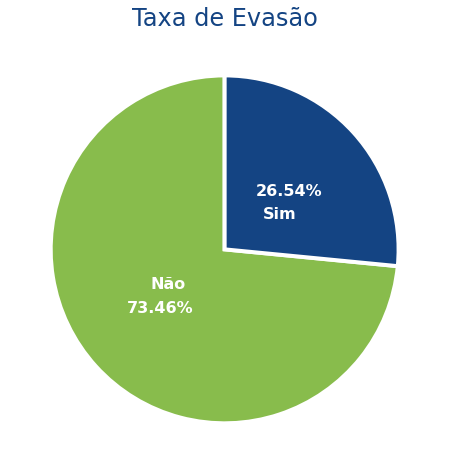

In [13]:
taxa_evasao = round(dados.churn.value_counts(normalize = True) * 100, 2)
cores = ('#88bc4c', '#144483')
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(taxa_evasao, 
       startangle = 90, 
       wedgeprops = {'linewidth': 4, 'edgecolor': 'white'},
       textprops = {'fontsize': 16, 'color': 'white', 'verticalalignment': 'center', 'weight': 'bold'},
       labels = ['Não', 'Sim'],
       labeldistance = 0.3,
       autopct='%.2f%%',
       pctdistance = 0.5,
       colors=cores)
ax.set_title('Taxa de Evasão', fontsize = 24, color = '#144483')
fig.savefig('taxa_evasao.png')
plt.show()

Através da análise de dados de 7043 clientes, observamos a taxa de evasão de 26,54% (1869 ocorrências). Iremos analisar com maior profundidade a relação da evasão com as demais informações fornecidas pela nossa base de dados.

# Análise da relação das variáveis categóricas com a variável target `churn`
## Analisando a relação Gênero x Churn

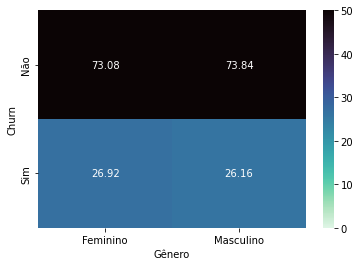

In [12]:
churn_genero = round(pd.crosstab(index = dados.churn, columns = dados.genero, normalize = 'columns') * 100, 2)
churn_genero.columns.name = 'Gênero'
churn_genero.index.name = 'Churn'
heatmap_genero = sns.heatmap(churn_genero, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_genero.get_figure()
fig.savefig('heatmap_genero.png')
plt.show()

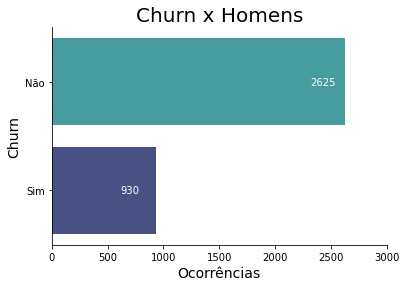

In [14]:
apenas_homens = dados.query('genero == "Masculino"')
plot = sns.countplot(data = apenas_homens, y = 'churn', palette = 'mako_r')
plot.set_title('Churn x Homens', fontsize = 20)
plot.set_ylabel('Churn', fontsize = 14)
plot.set_xlabel('Ocorrências', fontsize = 14)
plot.bar_label(plot.containers[0], label_type = 'edge', color = 'white', padding = -35)
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.set_xlim(xmax = 3000)
fig = plot.get_figure()
fig.savefig('homens_churn.png')
plt.show()

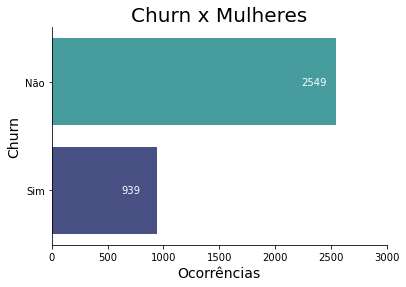

In [15]:
apenas_mulheres = dados.query('genero == "Feminino"')
plot = sns.countplot(data = apenas_mulheres, y = 'churn', palette = 'mako_r')
plot.set_title('Churn x Mulheres', fontsize = 20)
plot.set_ylabel('Churn', fontsize = 14)
plot.set_xlabel('Ocorrências', fontsize = 14)
plot.bar_label(plot.containers[0], label_type = 'edge', color = 'white', padding = -35)
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.set_xlim(xmax = 3000)
fig = plot.get_figure()
fig.savefig('mulheres_churn.png')
plt.show()

Podemos concluir que a variável `Gênero` **não influencia o** `Churn`, dada a proporção observada para os clientes que cancelaram o serviço é semelhante, independente do gênero.

## Analisando a relação Idoso x Churn

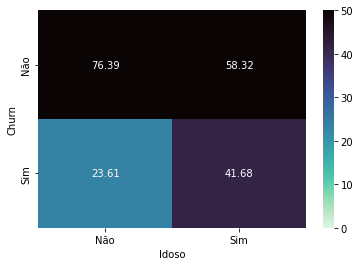

In [17]:
churn_idoso = round(pd.crosstab(index = dados.churn, columns = dados.idoso, normalize = 'columns') * 100, 2)
churn_idoso.columns.name  = 'Idoso'
churn_idoso.index.name = 'Churn'
heatmap_churn_idoso = sns.heatmap(churn_idoso, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_churn_idoso.get_figure()
fig.savefig('heatmap_churn_idoso.png')
plt.show()

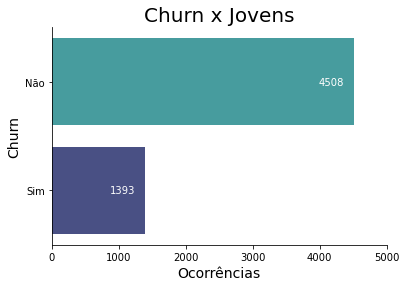

In [18]:
apenas_jovens = dados.query('idoso == "Não"')
plot = sns.countplot(data = apenas_jovens, y = 'churn', palette = 'mako_r')
plot.set_title('Churn x Jovens', fontsize = 20)
plot.set_ylabel('Churn', fontsize = 14)
plot.set_xlabel('Ocorrências', fontsize = 14)
plot.bar_label(plot.containers[0], label_type = 'edge', color = 'white', padding = -35)
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.set_xlim(xmax = 5000)
fig = plot.get_figure()
fig.savefig('jovens_churn.png')
plt.show()

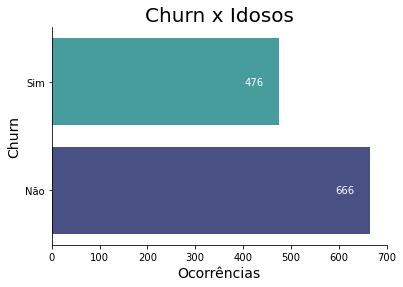

In [19]:
apenas_idosos = dados.query('idoso == "Sim"')
plot = sns.countplot(data = apenas_idosos, y = 'churn', palette = 'mako_r')
plot.set_title('Churn x Idosos', fontsize = 20)
plot.set_ylabel('Churn', fontsize = 14)
plot.set_xlabel('Ocorrências', fontsize = 14)
plot.bar_label(plot.containers[0], label_type = 'edge', color = 'white', padding = -35)
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.set_xlim(xmax = 700)
fig = plot.get_figure()
fig.savefig('idosos_churn.png')
plt.show()

Apesar de constituirem um grupo menor dentro da base de clientes, **os idosos estão mais propensos ao** `Churn`.

## Analisando a relação Casado x Churn

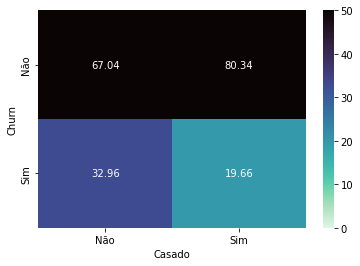

In [20]:
churn_casado = round(pd.crosstab(index = dados.churn, columns = dados.casado, normalize = 'columns') * 100, 2)
churn_casado.columns.name = 'Casado'
churn_casado.index.name = 'Churn'
heatmap_casado = sns.heatmap(churn_casado, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_casado.get_figure()
fig.savefig('heatmap_casado.png')
plt.show()

Podemos concluir que os clientes **solteiros estão mais propensos ao** `Churn`.

## Analisando a relação Dependentes x Churn

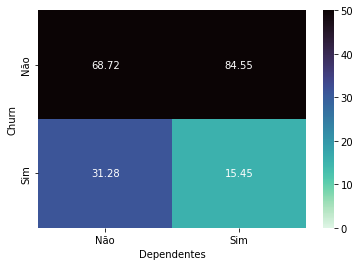

In [21]:
churn_dependentes = round(pd.crosstab(index = dados.churn, columns = dados.dependentes, normalize = 'columns') * 100, 2)
churn_dependentes.columns.name= 'Dependentes'
churn_dependentes.index.name = 'Churn'
heatmap_dependentes = sns.heatmap(churn_dependentes, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_dependentes.get_figure()
fig.savefig('heatmap_dependentes.png')
plt.show()

Podemos concluir que os clientes **que não possui dependentes estão mais propensos ao** `Churn`.

## Analisando a relação Assinatura de Telefone x Churn

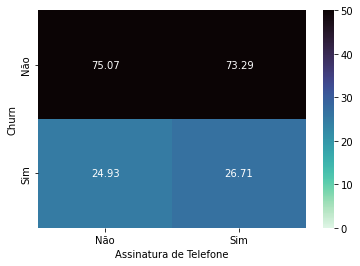

In [22]:
churn_assinatura_telefone = round(pd.crosstab(index = dados.churn, columns = dados.assinatura_telefone, normalize = 'columns') * 100, 2)
churn_assinatura_telefone.index.name = 'Churn'
churn_assinatura_telefone.columns.name = 'Assinatura de Telefone'
heatmap_telefone = sns.heatmap(churn_assinatura_telefone, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_telefone.get_figure()
fig.savefig('heatmap_telefone.png')
plt.show()

Podemos concluir que a variável `Assinatura Telefone` **possui não baixa relação com o** `Churn`.

## Analisando a relação Linhas Extras de Telefone x Churn

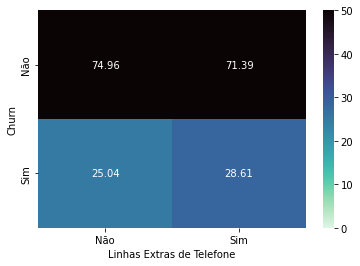

In [23]:
linhas_extras = dados.query('linhas_extras != "Sem assinatura de telefone"')
churn_linhas_extras = round(pd.crosstab(index = linhas_extras.churn, columns = linhas_extras.linhas_extras, normalize = 'columns') * 100, 2)
churn_linhas_extras.index.name = 'Churn'
churn_linhas_extras.columns.name = 'Linhas Extras de Telefone'
heatmap_lextras = sns.heatmap(churn_linhas_extras, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_lextras.get_figure()
fig.savefig('heatmap_lextras.png')
plt.show()

Podemos concluir que a variável `Linhas Extras` possui não baixa relação com o `Churn`.

## Analisando a relação Assinatura de Internet x Churn

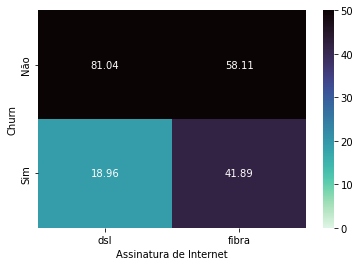

In [24]:
assinatura_internet = dados.query('assinatura_internet != "não contratada"')
churn_assinatura_internet = round(pd.crosstab(index = assinatura_internet.churn, columns = assinatura_internet.assinatura_internet, normalize = 'columns') * 100, 2)
churn_assinatura_internet.columns.name = 'Assinatura de Internet'
churn_assinatura_internet.index.name = 'Churn'
heatmap_internet = sns.heatmap(churn_assinatura_internet, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_internet.get_figure()
fig.savefig('heatmap_internet.png')
plt.show()

Podemos concluir que na variável `Assinatura de Internet`, **os clientes que fazem uso do serviço de fibra estão mais propensos ao** `Churn`.

## Analisando a relação Proteção Online x Churn

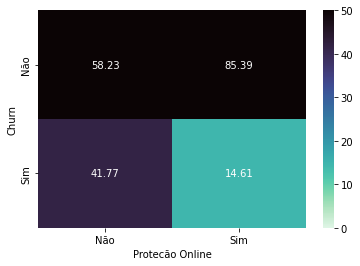

In [26]:
protecao_online = dados.query('protecao_online != "internet não contratada"')
churn_protecao_online = round(pd.crosstab(index = protecao_online.churn, columns = protecao_online.protecao_online, normalize = 'columns') * 100, 2)
churn_protecao_online.index.name = 'Churn'
churn_protecao_online.columns.name = 'Protecão Online'
heatmap_protecao = sns.heatmap(churn_protecao_online, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_protecao.get_figure()
fig.savefig('heatmap_protecao_online.png')
plt.show()

Podemos concluir que na variável `Proteção Online`, **os clientes que não fazem uso deste serviço extra estão mais propensos ao** `Churn`.

## Analisando a relação Backup Online x Churn

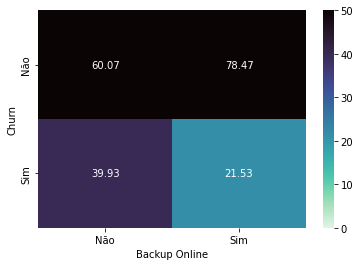

In [27]:
backup_nuvem = dados.query('backup_nuvem != "internet não contratada"')
churn_backup_nuvem = round(pd.crosstab(index = backup_nuvem.churn, columns = backup_nuvem.backup_nuvem, normalize = 'columns') * 100, 2)
churn_backup_nuvem.index.name = 'Churn'
churn_backup_nuvem.columns.name = 'Backup Online'
heatmap_backup = sns.heatmap(churn_backup_nuvem, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_backup.get_figure()
fig.savefig('heatmap_backup.png')
plt.show()

Podemos concluir que na variável `Backup Online`, **os clientes que não fazem uso deste serviço estão mais propensos ao** `Churn`.

## Analisando a relação Proteção de Dispositivo x Churn

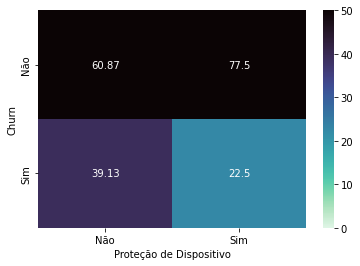

In [28]:
protecao_dispositivo = dados.query('protecao_dispositivo != "internet não contratada"')
churn_protecao_dispositivo = round(pd.crosstab(index = protecao_dispositivo.churn, columns = protecao_dispositivo.protecao_dispositivo, normalize = 'columns') * 100, 2)
churn_protecao_dispositivo.index.name = 'Churn'
churn_protecao_dispositivo.columns.name = 'Proteção de Dispositivo'
heatmap_protecao_dispositivo = sns.heatmap(churn_protecao_dispositivo, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_protecao_dispositivo.get_figure()
fig.savefig('heatmap_protecao_dispositivo.png')
plt.show()

Podemos concluir que na variável `Proteção de Dispositivo`, **os clientes que não fazem uso deste serviço estão mais propensos ao** `Churn`.

## Analisando a relação Suporte Técnico x Churn

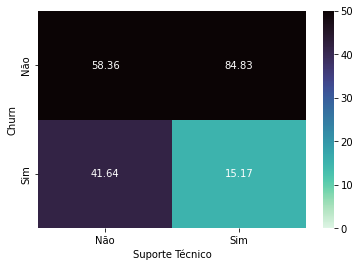

In [29]:
suporte_tecnico = dados.query('suporte_tecnico != "internet não contratada"')
churn_suporte_tecnico = round(pd.crosstab(index = suporte_tecnico.churn, columns = suporte_tecnico.suporte_tecnico, normalize = 'columns') * 100, 2)
churn_suporte_tecnico.index.name = 'Churn'
churn_suporte_tecnico.columns.name = 'Suporte Técnico'
heatmap_suporte = sns.heatmap(churn_suporte_tecnico, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_suporte.get_figure()
fig.savefig('heatmap_suporte.png')
plt.show()

Podemos concluir que na variável `Suporte Técnico`, **os clientes que não fazem uso deste serviço estão mais propensos ao** `Churn`.

## Analisando a relação Assinatura de Streaming TV x Churn

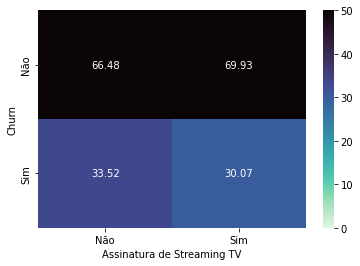

In [30]:
streaming_tv = dados.query('streaming_tv != "internet não contratada"')
churn_streaming_tv = round(pd.crosstab(index = streaming_tv.churn, columns = streaming_tv.streaming_tv, normalize = 'columns') * 100, 2)
churn_streaming_tv.index.name = 'Churn'
churn_streaming_tv.columns.name = 'Assinatura de Streaming TV'
heatmap_streamtv = sns.heatmap(churn_streaming_tv, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_streamtv.get_figure()
fig.savefig('heatmap_streamtv.png')
plt.show()

Podemos concluir que a variável `Assinatura de Streaming TV` **não afeta no** `Churn`, dada a proporção de pessoas usavam ou não deste serviço opcional que cancelaram o contrato serem semelhantes.

## Analisando a relação Assinatura de Streaming Filmes x Churn

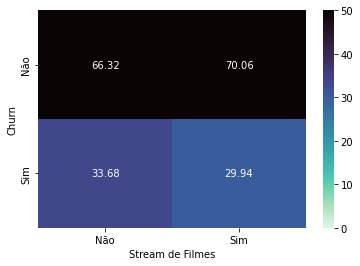

In [31]:
streaming_filmes = dados.query('streaming_filmes != "internet não contratada"')
churn_streaming_filmes = round(pd.crosstab(index = streaming_filmes.churn, columns = streaming_filmes.streaming_filmes, normalize = 'columns') * 100, 2)
churn_streaming_filmes.index.name = 'Churn'
churn_streaming_filmes.columns.name = 'Stream de Filmes'
heatmap_streamfilmes = sns.heatmap(churn_streaming_filmes, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_streamfilmes.get_figure()
fig.savefig('heatmap_streamfilmes.png')
plt.show()

Podemos concluir que a variável `Assinatura de Streaming Filmes` **não afeta no** `Churn`, dada a proporção de pessoas usavam ou não deste serviço opcional que cancelaram o contrato serem semelhantes.

## Analisando a relação Tipo de Contrato x Churn

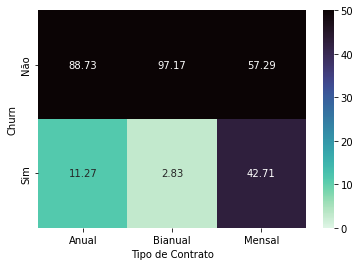

In [32]:
churn_contrato = round(pd.crosstab(index = dados.churn, columns = dados.contrato, normalize = 'columns') * 100, 2)
churn_contrato.index.name = 'Churn'
churn_contrato.columns.name = 'Tipo de Contrato'
heatmap_contrato = sns.heatmap(churn_contrato, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_contrato.get_figure()
fig.savefig('heatmap_contrato.png')
plt.show()

Podemos concluir que na variável `Tipo de Contrato`, **os clientes que optaram pelo contrato mensal estão mais propensos ao** `Churn`.

## Analisando a relação Cobrança Digital x Churn

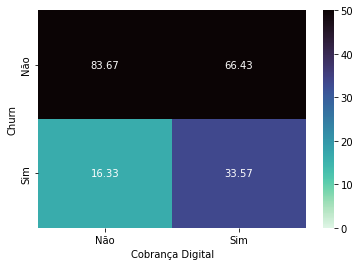

In [33]:
churn_cobranca_digital = round(pd.crosstab(index = dados.churn, columns = dados.cobranca_digital, normalize = 'columns') * 100, 2)
churn_cobranca_digital.index.name = 'Churn'
churn_cobranca_digital.columns.name = 'Cobrança Digital'
heatmap_cobranca = sns.heatmap(churn_cobranca_digital, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_cobranca.get_figure()
fig.savefig('heatmap_cobranca.png')
plt.show()

Podemos concluir que na variável `Cobrança Digital`, **os clientes que optaram pela cobrança digital estão mais propensos ao** `Churn`.

## Analisando a relação Método de Pagamento x Churn

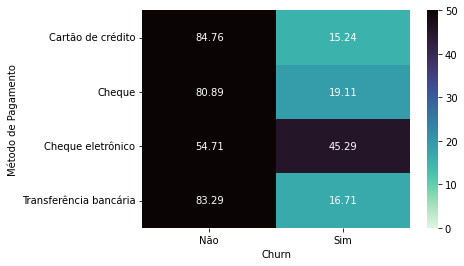

In [34]:
churn_metodo_pagamento = round(pd.crosstab(index = dados.metodo_pagamento, columns = dados.churn, normalize = 'index') * 100, 2)
churn_metodo_pagamento.index.name = 'Método de Pagamento'
churn_metodo_pagamento.columns.name = 'Churn'
heatmap_metodo_pagamento = sns.heatmap(churn_metodo_pagamento, cmap = 'mako_r', annot = True, fmt = 'g', vmin = 0, vmax = 50)
fig = heatmap_metodo_pagamento.get_figure()
fig.savefig('heatmap_metodo_pagamento.png')
plt.show()

Podemos concluir que na variável `Método de Pagamento`, **os clientes que optaram pelo pagamento com cheque eletrônico estão mais propensos ao** `Churn`.

## Analisando a variável Duração de Contrato

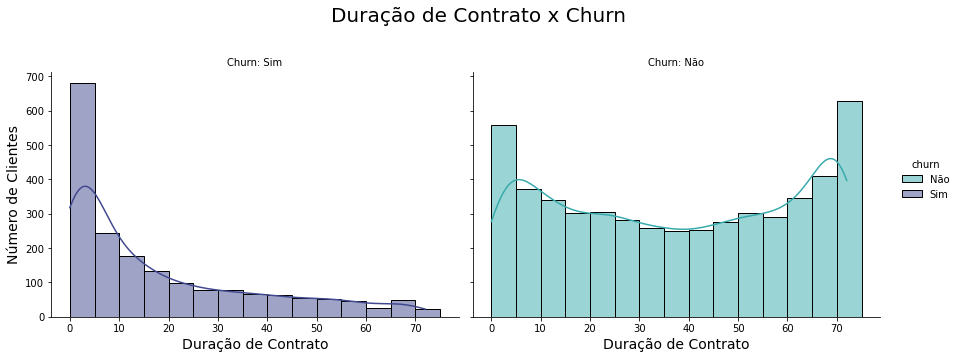

In [36]:
churn_duracao_contrato = sns.displot(
    data = dados,
    x = 'duracao_contrato',
    col = 'churn',
    binwidth = 5,
    aspect = 1.25,
    kde = True,
    hue = 'churn',
    col_order = ['Sim', 'Não'],
    palette = 'mako_r')
churn_duracao_contrato.set_axis_labels("Duração de Contrato", "Número de Clientes", fontsize = 14)
churn_duracao_contrato.set_titles("Churn: {col_name}")
churn_duracao_contrato.fig.subplots_adjust(top=0.8)
churn_duracao_contrato.fig.suptitle('Duração de Contrato x Churn', fontsize = 20)
churn_duracao_contrato.savefig('churn_duracao_contrato.png')
plt.show()

Podemos notar a concentração de novos clientes (até 5 meses de contrato), com uma maior tendência ao churn.

## Analisando a variável Custo Mensal

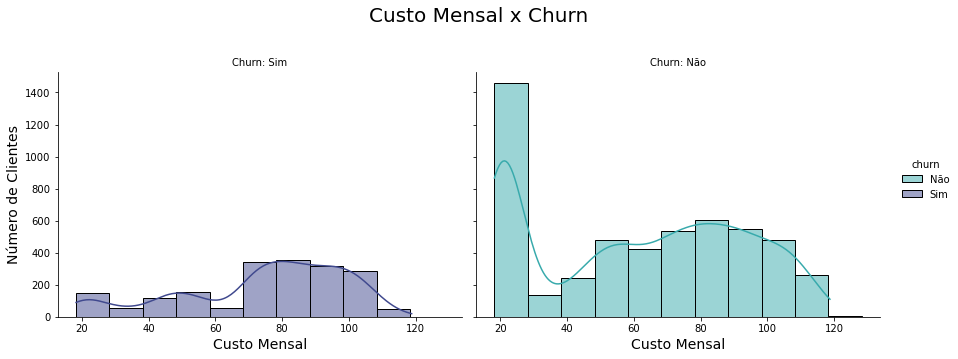

In [37]:
churn_custo_mensal = sns.displot(
    data = dados,
    x = 'custo_mensal',
    col = 'churn',
    binwidth = 10,
    aspect = 1.25,
    kde = True,
    hue = 'churn',
    col_order = ['Sim', 'Não'],
    palette = 'mako_r')
churn_custo_mensal.set_axis_labels("Custo Mensal", "Número de Clientes", fontsize = 14)
churn_custo_mensal.set_titles("Churn: {col_name}")
churn_custo_mensal.fig.subplots_adjust(top=0.8)
churn_custo_mensal.fig.suptitle('Custo Mensal x Churn', fontsize = 20)
churn_custo_mensal.savefig('churn_duracao_contrato.png')
plt.show()

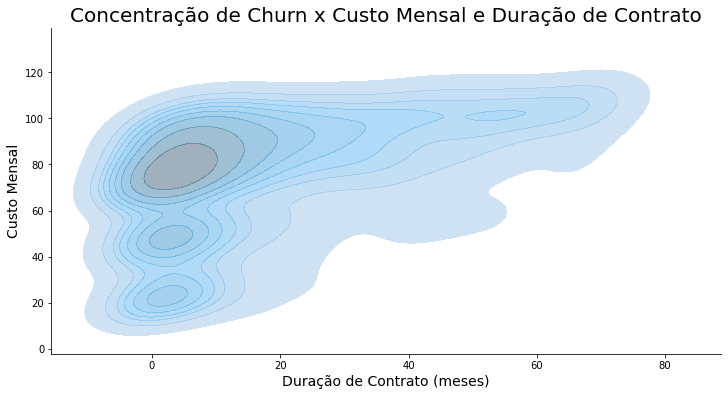

In [112]:
churn_positivo = dados.query('churn == "Sim"')
fig, ax = plt.subplots(figsize = (12,6))
churn_duracao_contrato_custo_mensal = sns.kdeplot(
    data = churn_positivo,
    x = 'duracao_contrato',
    y = 'custo_mensal',
    hue = 'churn',
    palette = "mako_r",
    alpha = .5,
    fill = True,
    legend = False)
ax.set_title('Concentração de Churn x Custo Mensal e Duração de Contrato', fontsize = 20)
churn_duracao_contrato_custo_mensal.spines['right'].set_visible(False)
churn_duracao_contrato_custo_mensal.spines['top'].set_visible(False)
churn_duracao_contrato_custo_mensal.set_ylabel('Custo Mensal', fontsize = 14)
churn_duracao_contrato_custo_mensal.set_xlabel('Duração de Contrato (meses)', fontsize = 14)
# churn_duracao_contrato_custo_mensal.axhline(70, color='r', linestyle="--", linewidth = 0.5)
# churn_duracao_contrato_custo_mensal.axhline(90, color='r', linestyle="--", linewidth = 0.5)
fig = churn_duracao_contrato_custo_mensal.get_figure()
fig.savefig('churn_duracao_contrato_custo_mensal.png')
plt.show()

Podemos notar a concentração de maior tendência ao `churn` para os clientes que tem custo mensal entre 70 e 100 reais. Também é possível constatar a maior tendência ao `churn` até os 20 primeiros meses de contrato.

## Analisando a variável Custo Total

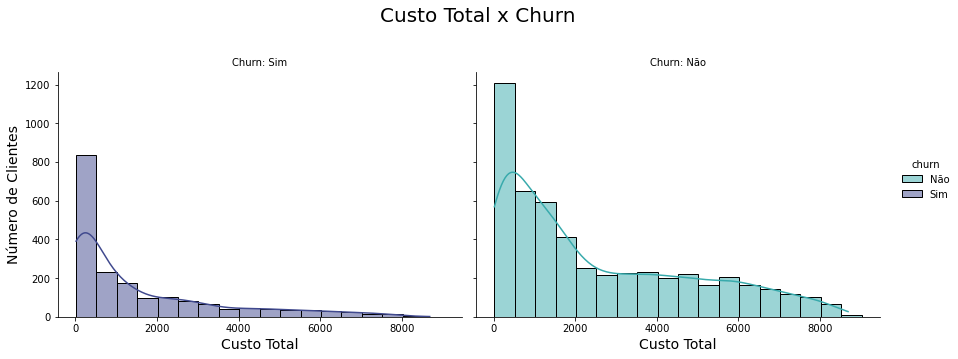

In [117]:
churn_custo_total = sns.displot(
    data = dados,
    x = 'custo_total',
    col = 'churn',
    binwidth = 500,
    aspect = 1.25,
    kde = True,
    hue = 'churn',
    col_order = ['Sim', 'Não'],
    palette = 'mako_r')
churn_custo_total.set_axis_labels("Custo Total", "Número de Clientes", fontsize = 14)
churn_custo_total.set_titles("Churn: {col_name}")
churn_custo_total.fig.subplots_adjust(top=0.8)
churn_custo_total.fig.suptitle('Custo Total x Churn', fontsize = 20)
churn_custo_total.savefig('churn_custo_total.png')
plt.show()

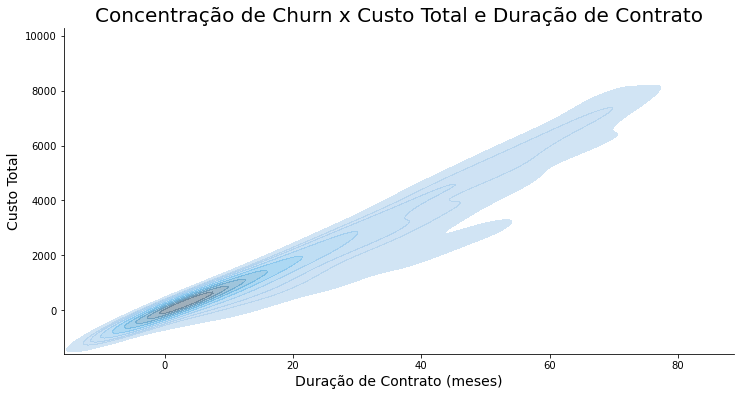

In [113]:
churn_positivo = dados.query('churn == "Sim"')
fig, ax = plt.subplots(figsize = (12,6))
churn_duracao_contrato_custo_total = sns.kdeplot(
    data = churn_positivo,
    x = 'duracao_contrato',
    y = 'custo_total',
    hue = 'churn',
    palette = "mako_r",
    alpha = .5,
    fill = True,
    legend = False)
ax.set_title('Concentração de Churn x Custo Total e Duração de Contrato', fontsize = 20)
churn_duracao_contrato_custo_total.spines['right'].set_visible(False)
churn_duracao_contrato_custo_total.spines['top'].set_visible(False)
churn_duracao_contrato_custo_total.set_ylabel('Custo Total', fontsize = 14)
churn_duracao_contrato_custo_total.set_xlabel('Duração de Contrato (meses)', fontsize = 14)
# churn_duracao_contrato_custo_total.axhline(700, color='r', linestyle="--", linewidth = 0.5)
fig = churn_duracao_contrato_custo_total.get_figure()
fig.savefig('churn_duracao_contrato_custo_total.png')
plt.show()

Podemos notar a concentração de maior tendência ao `churn` para os clientes que tem custo total até 2000 reais. Também é possível constatar a maior tendência ao `churn` até os 20 primeiros meses de contrato.

# Analisando a correlação das variáveis
Para proceder com o estudo da correlação das variáveis, será preciso realizar tratamento nas variáveis que são classificadas como categóricas.

In [40]:
apenas_var_categorica = dados.dtypes == 'object'
dados.dtypes[apenas_var_categorica].keys()

Index(['cliente_id', 'churn', 'genero', 'idoso', 'casado', 'dependentes',
       'assinatura_telefone', 'linhas_extras', 'assinatura_internet',
       'protecao_online', 'backup_nuvem', 'protecao_dispositivo',
       'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'contrato',
       'cobranca_digital', 'metodo_pagamento'],
      dtype='object')

In [42]:
dados_correlacao = dados.copy() # gerando cópia do dataframe original para evitar problemas
colunas_dados_categoricos = ['churn', 'genero', 'idoso', 'casado', 'dependentes',
       'assinatura_telefone', 'linhas_extras', 'assinatura_internet',
       'protecao_online', 'backup_nuvem', 'protecao_dispositivo',
       'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'contrato',
       'cobranca_digital', 'metodo_pagamento']
for coluna in colunas_dados_categoricos:
    dados_correlacao[coluna] = dados_correlacao[coluna].astype('category').cat.codes

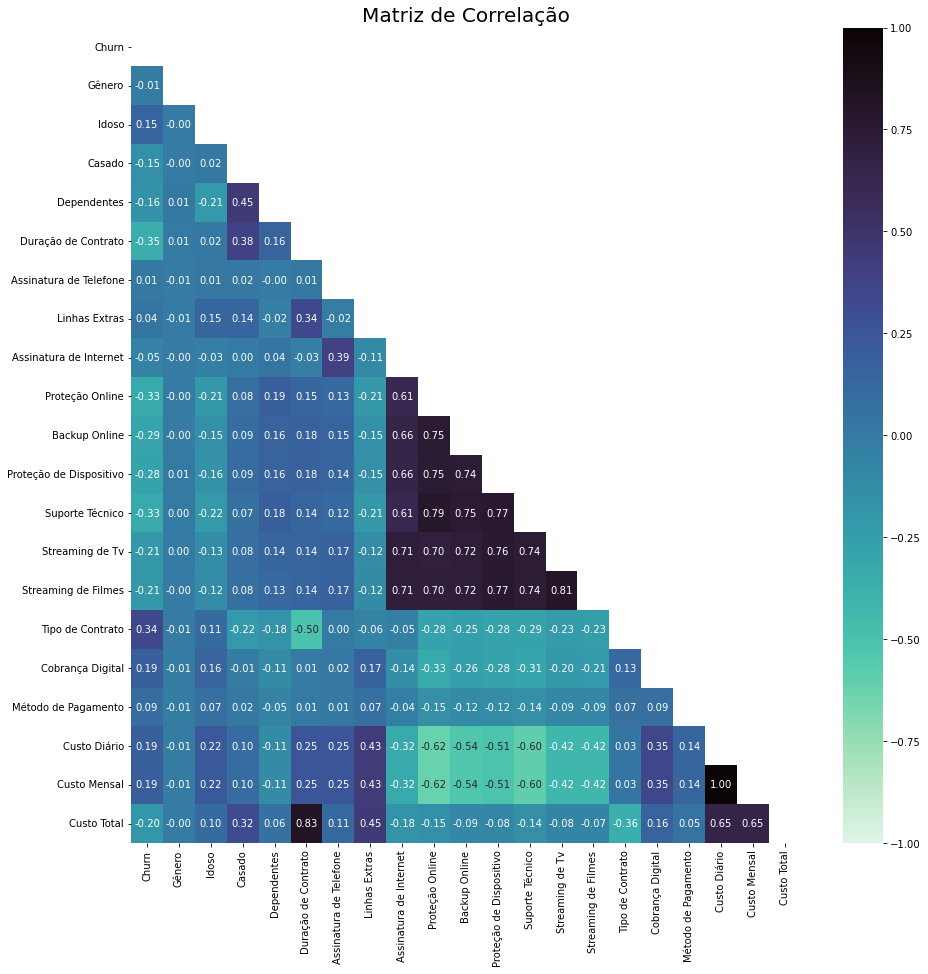

In [118]:
correlacao = dados_correlacao.corr()
mascara = np.triu(np.ones_like(correlacao, dtype = bool)) # máscara para ocultar dados repetidos na matriz de correlação
fig, ax = plt.subplots(figsize = (15,15))
rotulos_correlacao = ['Churn', 'Gênero', 'Idoso', 'Casado', 'Dependentes', 'Duração de Contrato', 'Assinatura de Telefone', 'Linhas Extras', 'Assinatura de Internet', 'Proteção Online', 'Backup Online', 'Proteção de Dispositivo', 'Suporte Técnico', 'Streaming de Tv', 'Streaming de Filmes', 'Tipo de Contrato', 'Cobrança Digital', 'Método de Pagamento', 'Custo Diário', 'Custo Mensal', 'Custo Total']
heatmap_corr = sns.heatmap(correlacao, mask = mascara, xticklabels = rotulos_correlacao, yticklabels = rotulos_correlacao, cmap = 'mako_r', annot=True, fmt='.2f', ax = ax, vmin=-1, vmax=1)
ax.set_title('Matriz de Correlação', fontsize = 20)
fig = heatmap_corr.get_figure()
fig.savefig('matriz_correlacao.png')
plt.show()

A análise das variáveis numa matriz de correlação indica a relação entre 2 variáveis, onde os valor para cada par de variáveis estará entre -1 e 1. Sendo o sinal indicador de correlação positiva ou negativa e o valor a força dessa correlação.

# Analisando a correlação com foco na variável target `Churn`

In [139]:
correlacao_churn = round(correlacao['churn'].to_frame(), 2)
rotulos_correlacao = {
    'churn': 'Churn',
    'genero': 'Gênero',
    'idoso': 'Idoso',
    'casado': 'Casado',
    'dependentes': 'Dependentes',
    'duracao_contrato': 'Duração de Contrato',
    'assinatura_telefone': 'Assinatura de Telefone',
    'linhas_extras': 'Linhas Extras',
    'assinatura_internet': 'Assinatura de Internet',
    'protecao_online': 'Proteção Online',
    'backup_nuvem': 'Backup Online',
    'protecao_dispositivo': 'Proteção de Dispositivo',
    'suporte_tecnico': 'Suporte Técnico',
    'streaming_tv': 'Streaming de Tv',
    'streaming_filmes': 'Streaming de Filmes',
    'contrato': 'Tipo de Contrato',
    'cobranca_digital': 'Cobrança Digital',
    'metodo_pagamento': 'Método de Pagamento',
    'custo_diario': 'Custo Diário',
    'custo_mensal': 'Custo Mensal',
    'custo_total': 'Custo Total'}
correlacao_churn.rename(index = rotulos_correlacao, columns = {'churn': 'Correlação'}, inplace = True)
correlacao_churn.sort_values(by = ['Correlação'], ascending = True)[:-1]

,Correlação
Duração de Contrato,-0.35
Suporte Técnico,-0.33
Proteção Online,-0.33
Backup Online,-0.29
Proteção de Dispositivo,-0.28
Streaming de Filmes,-0.21
Streaming de Tv,-0.21
Custo Total,-0.20
Dependentes,-0.16
Casado,-0.15


As variáveis que apresentam correlação são:
- **Duração de Contrato**: -0.35
- **Proteção Online**: -0.33
- **Suporte Técnico**: -0.33
- **Tipo de Contrato**: 0.34

As correlações destacadas apresentam correlação fraca, já as demais são desprezíveis.